In [1]:
#handling manipulation of data to get size of images and count them
import pandas as pd
import numpy as np
#handling showing images 
import matplotlib.pyplot as plt
%matplotlib inline
#handling style of showing images and graphics in matplotlib
#import seaborn as sns
#sns.set(style="whitegrid")
#handling folders and help in read and remove folders
import os
#handling pathes of folders and return content of specific pathes
import glob as gb
import cv2
import tensorflow as tf
from tensorflow import keras

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
trainpath ='/kaggle/input/brain-tumor-mri-dataset/Training/'
testpath = '/kaggle/input/brain-tumor-mri-dataset/Testing/'

In [3]:
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 1457 in folder pituitary
For training data , found 1595 in folder notumor
For training data , found 1339 in folder meningioma
For training data , found 1321 in folder glioma


In [4]:
for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str( testpath + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 300 in folder pituitary
For training data , found 405 in folder notumor
For training data , found 306 in folder meningioma
For training data , found 300 in folder glioma


In [5]:
#dictionary of all exist classes and its numberic values in used in dataset 
code = {'pituitary':0 ,'notumor':1 ,'meningioma':2 ,'glioma':3}

#used for getting name of class x  using its number n or y
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [6]:
size = []

for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
        
#count each similar size contained in size list to know most common size in images        
pd.Series(size).value_counts()

(512, 512)       2433
(512, 512, 3)    1522
(225, 225, 3)     267
(630, 630, 3)      64
(236, 236, 3)      53
                 ... 
(310, 329, 3)       1
(202, 216, 3)       1
(253, 278, 3)       1
(664, 550, 4)       1
(412, 300, 3)       1
Length: 395, dtype: int64

In [7]:
size = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(512, 512)       616
(512, 512, 3)    171
(225, 225, 3)     64
(236, 236, 3)     28
(222, 227, 3)     17
                ... 
(249, 201, 3)      1
(351, 321, 3)      1
(393, 350, 3)      1
(474, 356, 3)      1
(306, 306, 3)      1
Length: 198, dtype: int64

In [8]:
IMG_SIZE = 100

In [9]:
#empty list to contain images itself called featues for the CNN model  
X_train = []
#empty list to contain actual value for each image
y_train = []

for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (IMG_SIZE,IMG_SIZE))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [10]:
print(f'we have {len(X_train)} items in X_train')

we have 5712 items in X_train


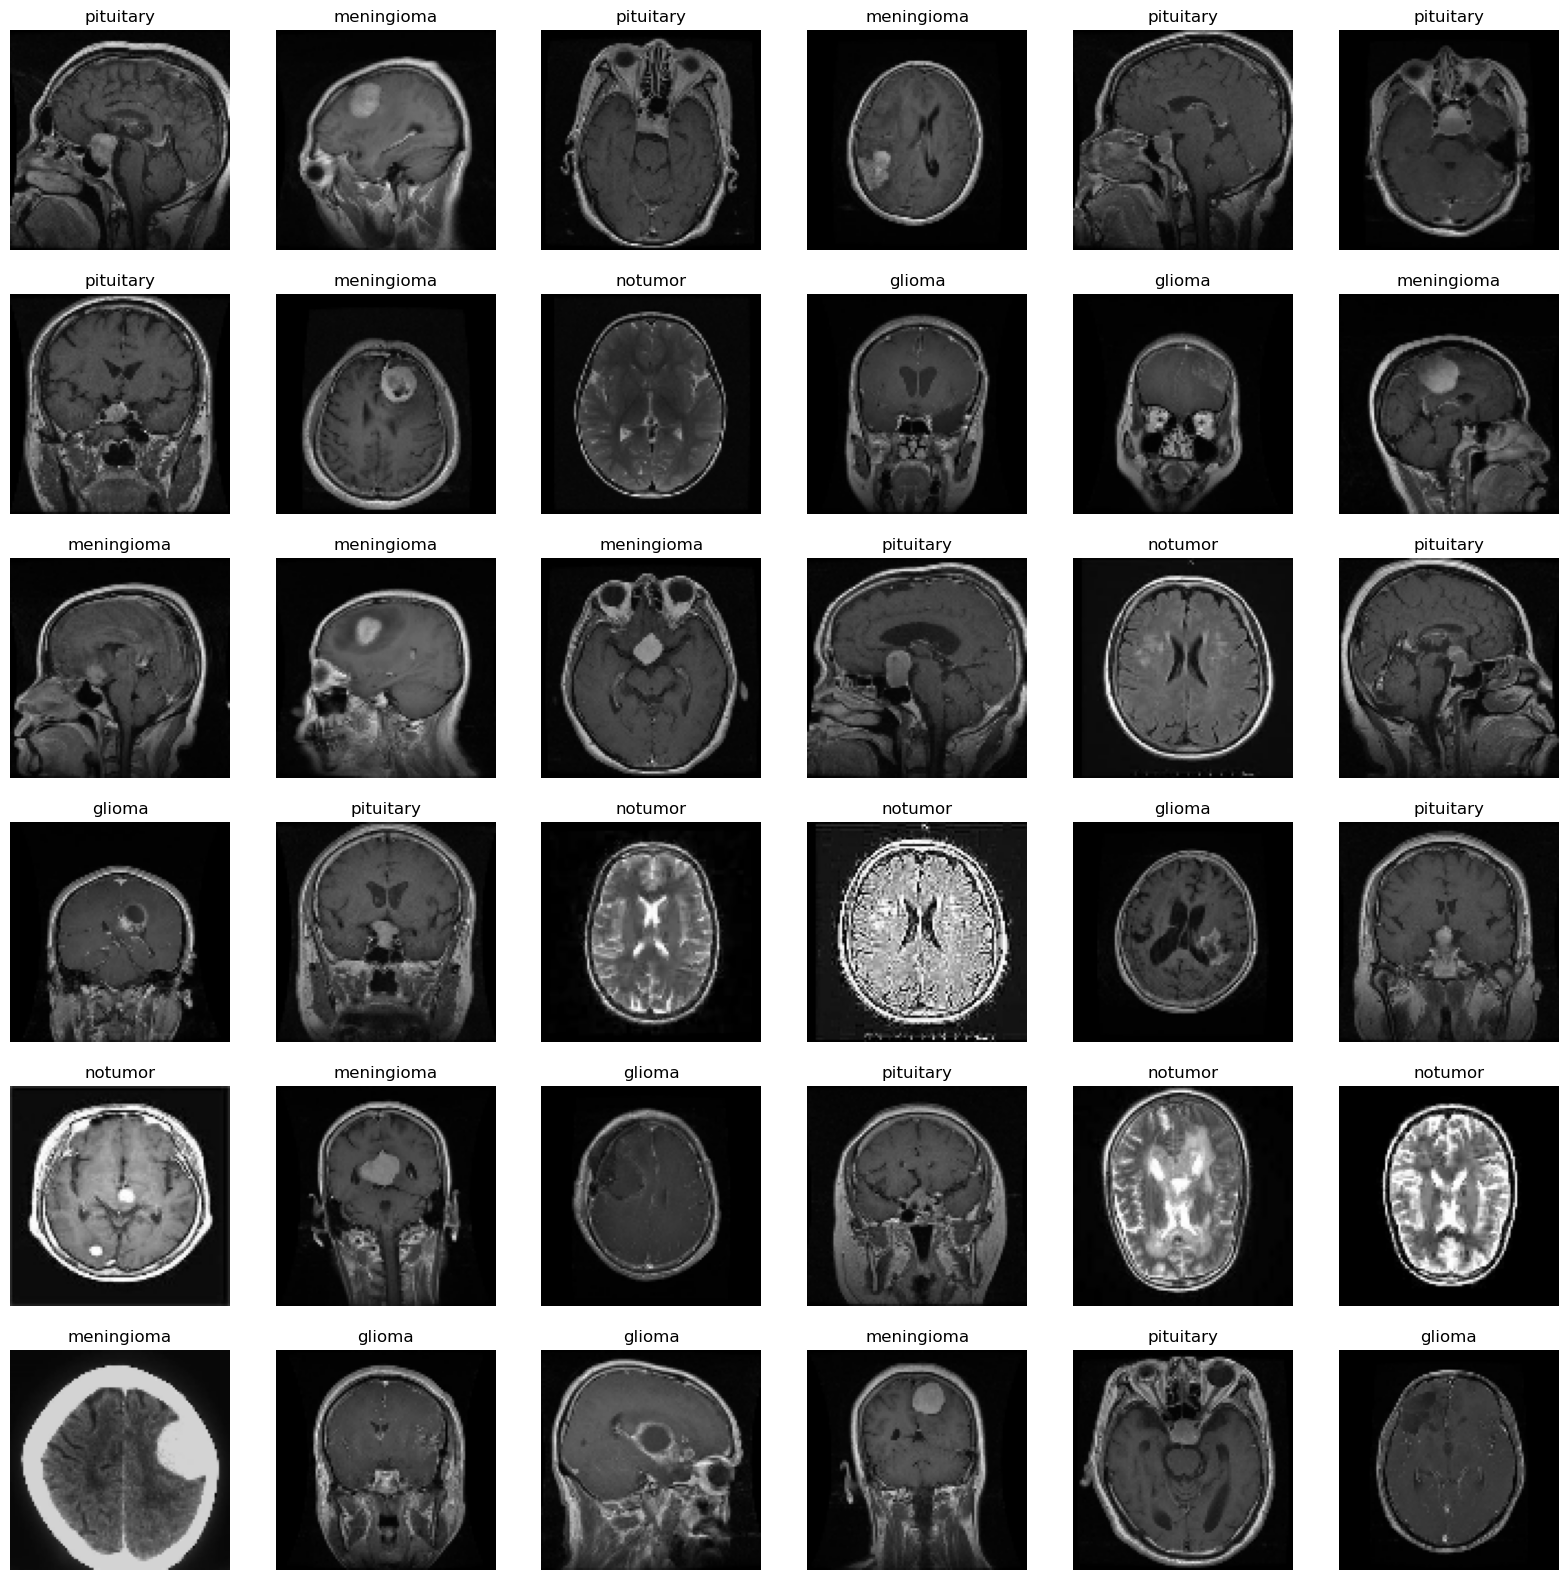

In [11]:
plt.figure(figsize=(20,20))

for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [12]:
X_test = []
y_test = []
for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str(testpath + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (IMG_SIZE,IMG_SIZE))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [13]:
print(f'we have {len(X_test)} items in X_test')

we have 1311 items in X_test


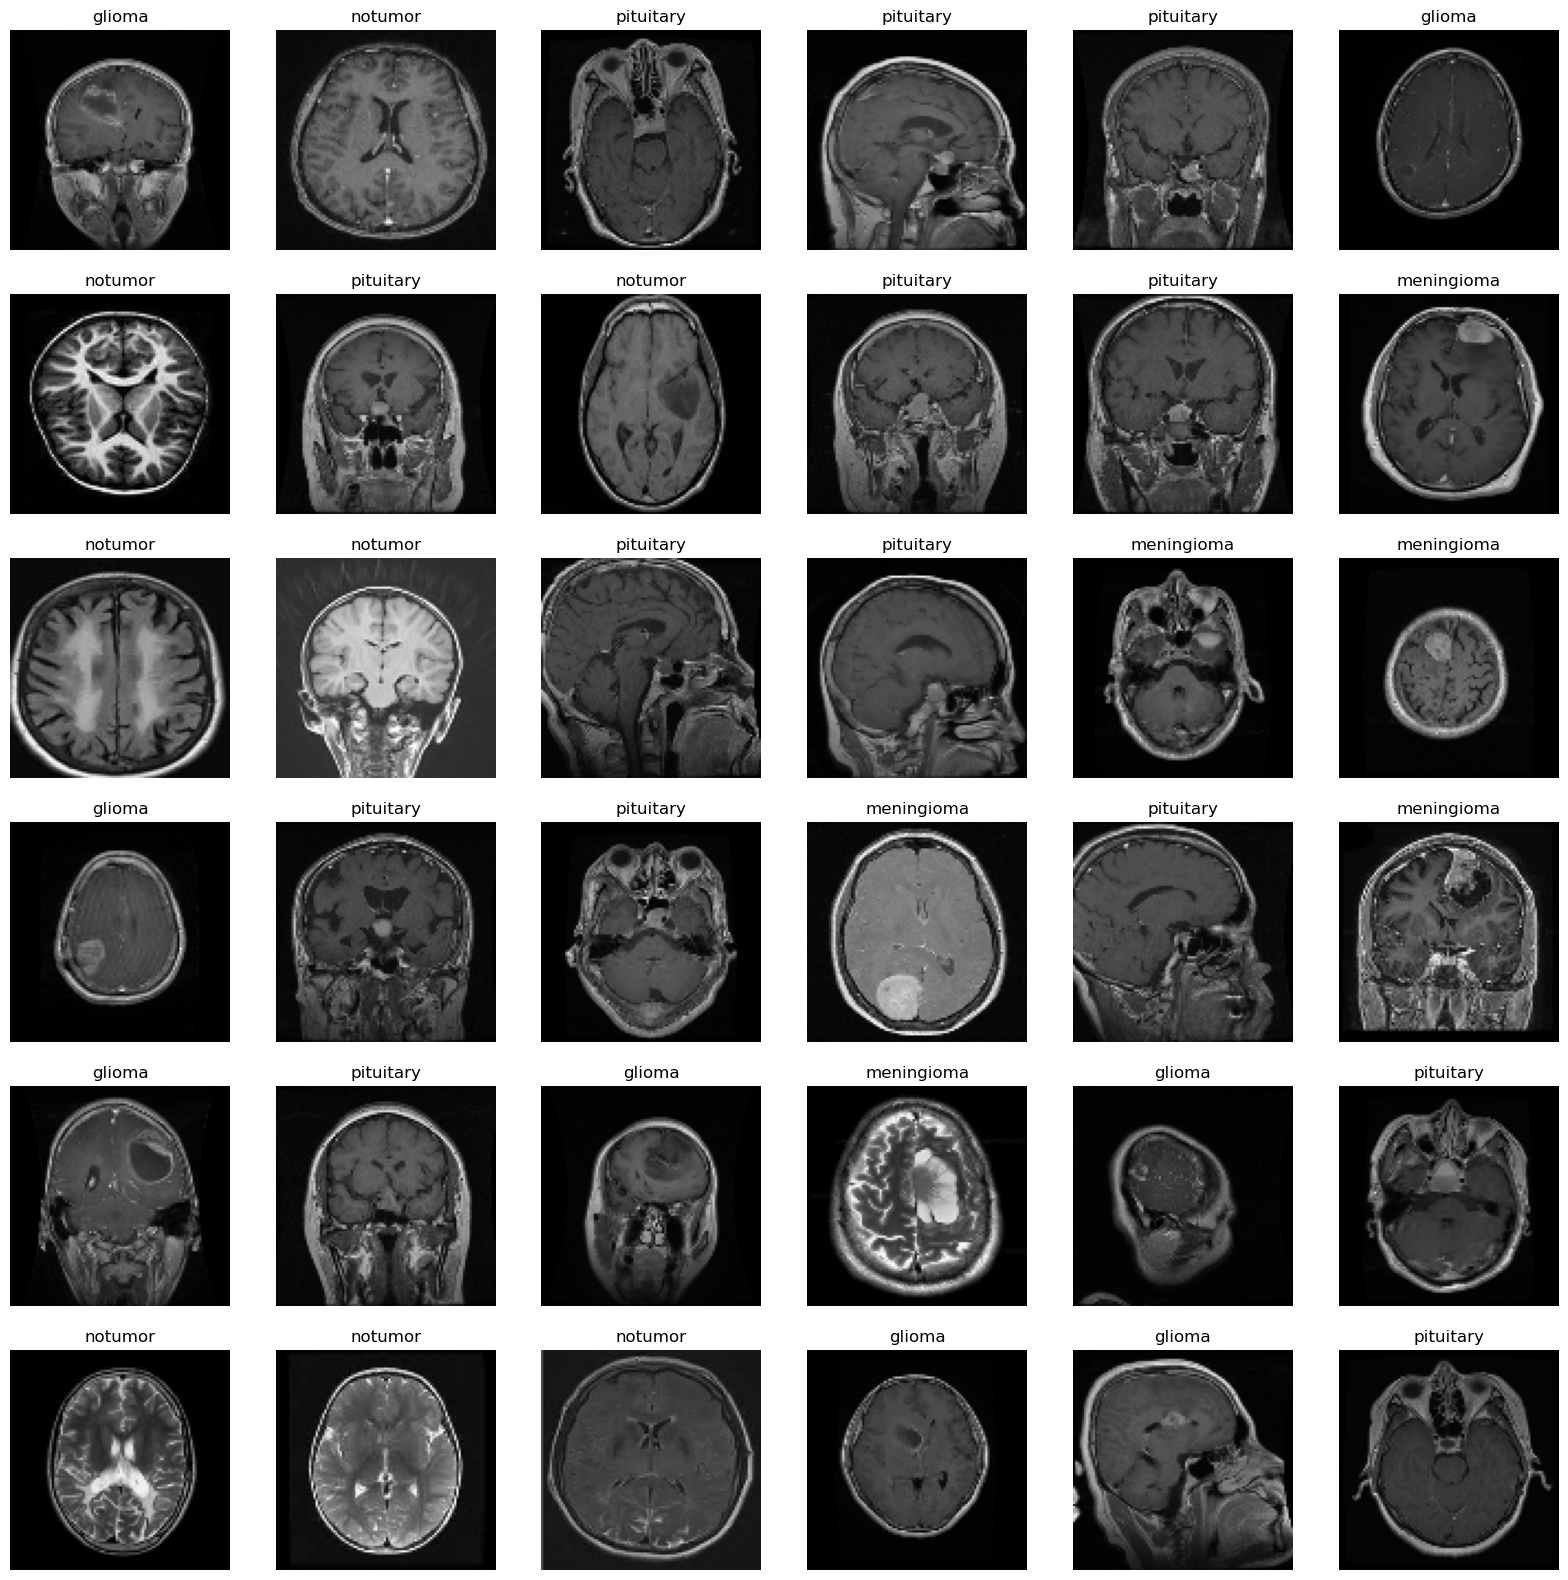

In [14]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [15]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')

print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (5712, 100, 100, 3)
X_test shape  is (1311, 100, 100, 3)
y_train shape  is (5712,)
y_test shape  is (1311,)


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

num_classes = 4

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=20)              

Epoch 1/20
179/179 [==============================] - 18s 8ms/step - loss: 3.8190 - accuracy: 0.7255
Epoch 2/20
179/179 [==============================] - 1s 7ms/step - loss: 0.2921 - accuracy: 0.8923
Epoch 3/20
179/179 [==============================] - 1s 7ms/step - loss: 0.1607 - accuracy: 0.9449
Epoch 4/20
179/179 [==============================] - 1s 7ms/step - loss: 0.0871 - accuracy: 0.9699
Epoch 5/20
179/179 [==============================] - 1s 7ms/step - loss: 0.0712 - accuracy: 0.9760
Epoch 6/20
179/179 [==============================] - 1s 8ms/step - loss: 0.0529 - accuracy: 0.9820
Epoch 7/20
179/179 [==============================] - 1s 8ms/step - loss: 0.0667 - accuracy: 0.9792
Epoch 8/20
179/179 [==============================] - 1s 7ms/step - loss: 0.0457 - accuracy: 0.9837
Epoch 9/20
179/179 [==============================] - 1s 7ms/step - loss: 0.0150 - accuracy: 0.9970
Epoch 10/20
179/179 [==============================] - 1s 7ms/step - loss: 0.0505 - accuracy: 0.983

In [19]:
model.evaluate(X_test,y_test)

41/41 [==============================] - 1s 8ms/step - loss: 0.2014 - accuracy: 0.9565


[0.2013714611530304, 0.95652174949646]

In [20]:
predictions = model.predict(X_test)
predictions

41/41 [==============================] - 0s 3ms/step


array([[ 23.300089 ,   2.6111515,  -4.7142615, -23.635551 ],
       [ 28.830267 ,  -4.30696  ,  -1.917478 , -12.38542  ],
       [ 21.476877 ,  -3.31267  ,  -2.231014 , -25.48602  ],
       ...,
       [ -7.500474 , -12.139054 ,  -9.445966 ,  18.402706 ],
       [  1.574429 ,  -9.219554 ,  -2.445033 ,  14.348589 ],
       [ -5.3144846,  -7.9701824,   9.677394 ,  13.481954 ]],
      dtype=float32)

In [21]:
score = tf.nn.softmax(predictions[0])

In [22]:
np.argmax(score)

0

In [23]:
y_test[0]

0